# KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plot_learning_curve as plotlearn
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
# Carrega os dados
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)
# Reinicia o index
data = data.reset_index()
# Pega os IDs unicos campo 'subject'
unisub = list(data['subject'].unique())
# Cria ID numerico sequencial
mlist = [int(x) for x in range(len(unisub))]
# Vincula o Id numerico com o campo 'subject'
newvalue = dict(zip(unisub, mlist))
# Exibe dados tratados
data['subject'] = data['subject'].map(newvalue)


# import some data to play with


# Divide o conjunto de dados utilizando a proporção 80:20
train, test = train_test_split(data, test_size = 0.2)

#iris = datasets.load_iris()

features = list(data.columns[2:])

X = train[features].values
y = train['subject'].values




In [3]:
#neigh = KNeighborsClassifier(n_neighbors=3, algorithm='brute',metric='cosine').fit(X, y) #35

In [4]:
#neigh = KNeighborsClassifier(n_neighbors=30,weights ='uniform', algorithm='auto',metric='manhattan').fit(X, y) #31

In [11]:
neigh = KNeighborsClassifier(n_neighbors=10, weights ='uniform', algorithm='brute',metric='manhattan',n_jobs =-1)

In [12]:
bagging = BaggingClassifier(neigh,n_estimators=10, max_features=3,max_samples=1.0)

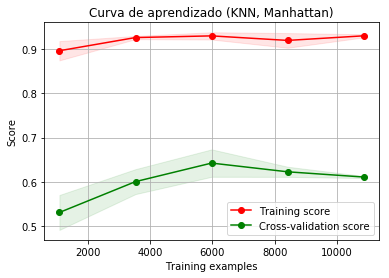

In [13]:
title = "Curva de aprendizado (KNN, Manhattan)"
plotlearn.plot_learning_curve(bagging, title, X, y)

plt.show()

In [14]:
bagging.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=3,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [15]:
x_test = test[features]
y_test = test['subject']
# predict the output using the test data on the learned model
predicted_output = bagging.predict(x_test)


In [16]:
model_accuracy = metrics.accuracy_score(y_test, predicted_output)
model_accuracy

0.667156862745098